In [45]:
# PASSO 1 - Instalando as Bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

In [33]:
# PASSO 2 - Lenado arquivo do projeto no formato csv
df = pd.read_csv('data-1.csv')

In [34]:
# PASSO 3 - exibir planilha
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [35]:
# PASSO 4 - Preparando o Dataset

# Separar entre x (features) e y (target)
# x deve conter todas as colunas, execeto "diagnosis"
# y será a coluna "diagnosis", convertendo em valores
    # B (benigno) -> 0
    # M (maligno) -> 1

X = df.iloc[:, 2:-1]
y = df.iloc[:, 1]
y = y.replace({'B' : 0, 'M' :1})


C:\Users\Wellington Neves\AppData\Local\Temp\ipykernel_2820\55254065.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace({'B' : 0, 'M' :1})


In [ ]:
# Removendo sa colunas desnecessárias
#df.drop(columns=['id', 'Unnamed: 32'], inplace=True)


In [ ]:
# PASSO 5 - Divisão do treino/Teste

# Para a divisão em treino e teste, vamos separar 70% para treino e 30% para
# teste, declarando o seed random. Use os seguintes parâmetros,
# completando corretamente:

# Usar train_test_split para dividir os dados.
# Definir test_size (30% do total).
# Utilizar um random_state fixo para reprodutibilidade.

# Definição do tamanho do conjunto de teste
test_size = 0.3 
# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=10)

In [ ]:
# PASSO 6 - Redução Dimensionalidade com PCA

# Escalonamento dos dados - aplicando fit_transform no treino, transform no teste

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# A seguir é possível aplicar a transformação com PCA nos dados já
# escalonados:
pca = PCA(n_components=10, random_state=10)
pca.fit(X_train_scaled)

# Após isso, será possível analisar a explicabilidade das variâncias nos dados,
# a partir dos componentes:

pca.explained_variance_ratio_


array([0.4383292 , 0.18413908, 0.10158532, 0.06803093, 0.05624249,
       0.03953245, 0.02437355, 0.01630403, 0.01462998, 0.01175767])

In [ ]:
# Soma acumulada da variância explicada
explained_variance_cumsum = np.cumsum(pca.explained_variance_ratio_)
# Encontrando o número mínimo de componentes que explicam pelo menos 70% da variância
n_components_70 = np.argmax(explained_variance_cumsum >= 0.70) + 1  # +1 porque índices começam em 0
print(f"Componentes variação 70%: {n_components_70}")

Número de componentes necessários da variância de 70%: 3


In [79]:
# PASSO 8

# Em nosso problema, queremos criar os modelos de classificação utilizando
# apenas os primeiros componentes que representem pelo menos 70% da
# variância dos dados. Para isso você deve analisar as variâncias das
# componentes. Feita a análise, criamos então os datasets X_train_pca e
# X_test_pca, transformados pelo PCA e utilizando o número de componente
# identificado por você, em n_components.

pca = PCA(n_components=3 , random_state=10)
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [80]:
# PASSO 9
# Busca de Hiperparâmetros com Validação Cruzada
# Iremos utilizar um DecisionTreeClassifier como modelo base e os
# hiperparâmetros que queremos testar serão:

#Solução com GridSearchCV (Busca Exaustiva)

estimador = DecisionTreeClassifier(random_state=10)

# Definição do grid de hiperparâmetros
param_grid = {
    "max_depth": [3, None],
    "min_samples_split": [2, 10]
}

# Configuração do GridSearchCV
grid = GridSearchCV(
    estimator=estimador,
    param_grid=param_grid,
    scoring="accuracy",  
    cv=5 
)

# Treinamento da busca
grid.fit(X_train_pca, y_train)

# Melhor combinação encontrada
print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

Melhores hiperparâmetros: {'max_depth': 3, 'min_samples_split': 2}
Melhor acurácia: 0.9219620253164557


In [ ]:
# Definição do modelo base
estimador = DecisionTreeClassifier(random_state=10)

# Definição da distribuição de hiperparâmetros
param_distributions = {
    "max_depth": [3, None],
    "min_samples_split": [2, 10]
}

# Configuração do RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=estimador,
    param_distributions=param_distributions,
    scoring="accuracy",
    cv=5,
    n_iter=2,  # Número de combinações aleatórias a testar (pode aumentar se quiser mais exploração)
    random_state=10
)

# Treinamento da busca
random_search.fit(X_train_pca, y_train)

# Melhor combinação encontrada
print("Melhores hiperparâmetros:", random_search.best_params_)
print("Melhor acurácia:", random_search.best_score_)

In [85]:
# PASSO 10

# Lembre-se que após a busca pelos hiperparâmetros, é possível analisar os
# resultados visualizando as saídas:

# mostra um DataFrame com todas as combinações testadas, 
# incluindo acurácia média e desvio padrão para cada configuração.

# Exibe os resultados detalhados da validação cruzada
#import pandas as pd
pd.DataFrame(grid.cv_results_)



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004306,0.006567,0.000399,0.000489,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.9125,0.9750,0.9375,0.898734,0.886076,0.921962,0.031532,1
1,0.001142,0.000254,0.000399,0.000488,3,10,"{'max_depth': 3, 'min_samples_split': 10}",0.9125,0.9750,0.9375,0.886076,0.886076,0.919430,0.033727,2
2,0.001571,0.002671,0.000000,0.000000,None,2,"{'max_depth': None, 'min_samples_split': 2}",0.9500,0.9375,0.9375,0.860759,0.911392,0.919430,0.031920,2
3,0.000733,0.000618,0.001168,0.001388,None,10,"{'max_depth': None, 'min_samples_split': 10}",0.9375,0.9500,0.9250,0.848101,0.898734,0.911867,0.036117,4


In [ ]:
# PASSO 11 - Resultados

print("Melhor índice:", grid.best_index_)
print("Melhor hiperparâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)
print("Melhor modelo:", grid.best_estimator_)





Melhor índice: 0
Melhor hiperparâmetros: {'max_depth': 3, 'min_samples_split': 2}
Melhor acurácia: 0.9219620253164557
Melhor modelo: DecisionTreeClassifier(max_depth=3, random_state=10)


In [90]:
# PASSO 12 - Metodo Ensemble
# Criar modelo base, com os melhores hiperparatros

estimator = DecisionTreeClassifier(random_state=10, max_depth=3, min_samples_split=2)



In [91]:
# PASSO 12 - Construir o modelo ensemble com 100 estimadores:
# Modelo ensemble com 100 estimadores
ensemble = BaggingClassifier(estimator=estimator, n_estimators=100, random_state=10)


In [ ]:
# PASSO 13
# Treinando o modelo ensemble
ensemble.fit(X_train_pca, y_train)
# Fazendo previsões no conjunto de teste
y_pred = ensemble.predict(X_test_pca)
# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia Modelo Bagging: {accuracy:.4f}")

Acurácia: 0.9591


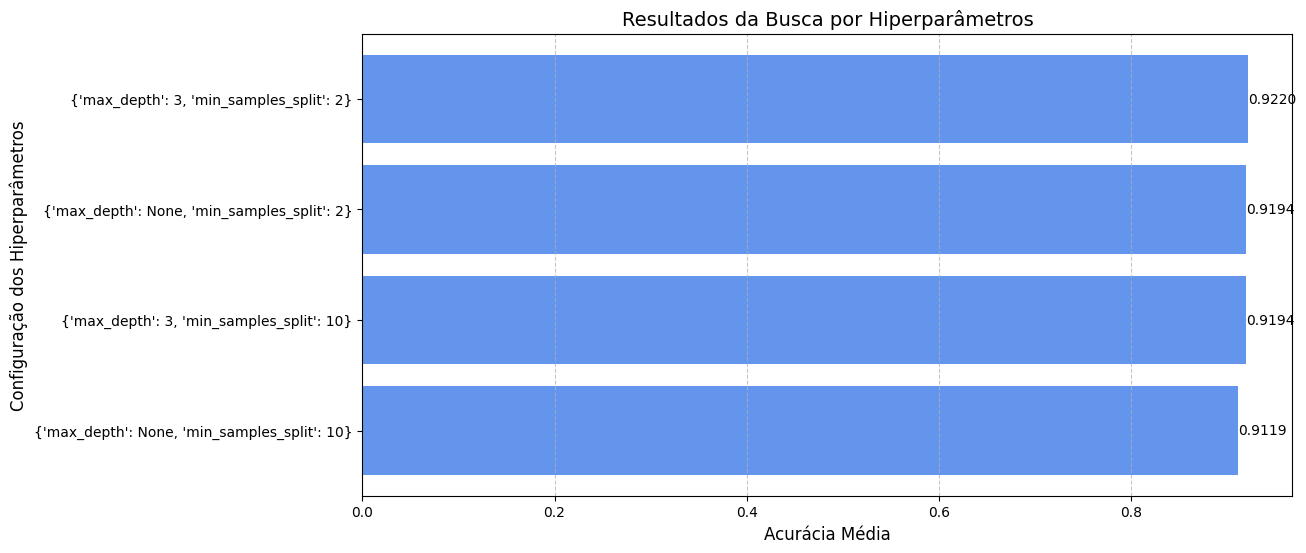

In [96]:
import matplotlib.pyplot as plt
import numpy as np

scores = grid.cv_results_["mean_test_score"]
params = [str(p) for p in grid.cv_results_["params"]]
sorted_indices = np.argsort(scores)
scores_sorted = np.array(scores)[sorted_indices]
params_sorted = np.array(params)[sorted_indices]
plt.figure(figsize=(12, 6))
bars = plt.barh(params_sorted, scores_sorted, color="cornflowerblue")

for bar, score in zip(bars, scores_sorted):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
             f"{score:.4f}", va='center', fontsize=10)

plt.xlabel("Acurácia Média", fontsize=12)
plt.ylabel("Configuração dos Hiperparâmetros", fontsize=12)
plt.title("Resultados da Busca por Hiperparâmetros", fontsize=14)
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()
